# SMTP Spam Attacks

In depth look into SMTP related NetFlow records. 

06-20-16: heavy SMTP traffic a lot of spam attacked detected
06-22-16: no SMTP spam detected

In [3]:
%matplotlib inline
# Preamble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime
from dateutil.parser import parse
import collections
import math
import time
import os
import subprocess

import networkx as nx
from networkx.algorithms import isomorphism
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph

import graphviz as gv
import hashlib
import pickle

import UgrUtils as ugr

In [4]:
width = 30 * 60 # 30 minutes
spam_attackers = ["42.219.156.212", "42.219.156.213", "42.219.156.214", "42.219.156.215", "42.219.156.223"]
cali_filename = "Netflow Data/2016-06-22_SMTP.csv"
attack_filename = "Netflow Data/2016-06-20_SMTP_1400_1600.csv"

In [5]:
# cali_groups = ugr.readAndGroupByTimebin(cali_filename, width)
attack_groups = ugr.readAndGroupByTimebin(attack_filename, width)

FileNotFoundError: File b'Netflow Data/2016-06-20_SMTP_1400_1600.csv' does not exist

In [12]:
cali_groups = ugr.readAndGroupByTimebin(cali_filename, width)

In [239]:
calib_fim = pickle.load(open('out_calib.pb', 'rb'))
attack_pickle = pickle.load(open('out_sampled_100_30min.pb', 'rb'))
attack_fim = attack_pickle["FIM"]
attack_flow = attack_pickle["Flow"]

In [110]:
def itemsetAttr(itemset):
    da, sa, sp, dp = None, None, None, None
    _da = list(filter(lambda x: x.startswith('da'), itemset))
    _sa = list(filter(lambda x: x.startswith('sa'), itemset))
    _dp = list(filter(lambda x: x.startswith('dp'), itemset))
    _sp = list(filter(lambda x: x.startswith('sp'), itemset))
    
    f = lambda x : x[3:]
    if _da: da = f(_da[0])
    if _sa: sa = f(_sa[0])
    if _dp: dp = f(_dp[0])
    if _sp: sp = f(_sp[0])
    return (sa, da, sp, dp)

def graphFIM(fim):
    G = nx.MultiGraph()
    for items, sup in fim.items():
        da, sa, sp, dp = itemsetAttr(items)
        if da is not None and sa is not None:
            G.add_node(da)
            G.add_node(sa)
            G.add_edge(sa, da, weight = str(sup))
    return G

In [113]:
def graphvizFromSAM(samOutput, flows = 1):
    # strict false so allow multiple edges
    g1 = gv.Digraph(format='svg', engine='sfdp', strict=False)

    def getLabel(id):
        # guaranteed that id is in idToLabel
        return idToLabel[id]

    def hashString(s):
        hash_object = hashlib.sha1(str.encode(s))
        hex_dig = hash_object.hexdigest()
        return hex_dig[:8]
    
    getId = hashString
    
    for items, sup in samOutput.items():
        sa, da, sp, dp = itemsetAttr(items)
        if da is not None and sa is not None:
#             print(items)
            sa_color = 'red' if sa in spam_attackers else 'white'
            da_color = 'red' if da in spam_attackers else 'white'

            g1.node(getId(sa), sa, fillcolor = sa_color, style = 'filled')
            g1.node(getId(da), da, fillcolor = da_color, style = 'filled')

            g1.edge(getId(sa), getId(da), label = str(( (int) (sup * flows))))
    return g1

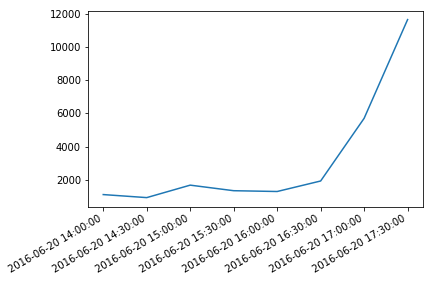

In [242]:
fig, ax = plt.subplots(1)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
ax.plot([k for k,v in attack_flow.items()], [v for k,v in attack_flow.items()])
fig.autofmt_xdate()

In [243]:
attack_fim.keys()

dict_keys(['2016-06-20 14:00:00', '2016-06-20 14:30:00', '2016-06-20 15:00:00', '2016-06-20 15:30:00', '2016-06-20 16:00:00', '2016-06-20 16:30:00', '2016-06-20 17:00:00', '2016-06-20 17:30:00'])

('da:234.24.89.47', 'sa:42.219.158.160', 'sp:25.0')
('da:42.219.158.188', 'dp:25.0', 'sa:203.204.36.22')
('da:42.219.158.160', 'dp:25.0', 'sa:234.24.89.47')
('da:203.204.36.22', 'sa:42.219.158.188', 'sp:25.0')


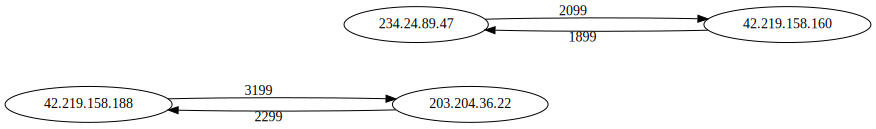

In [244]:
graphvizFromSAM(attack_fim['2016-06-20 14:00:00'], attack_flow['2016-06-20 14:00:00'])

('da:42.219.154.116', 'dp:587.0', 'sa:60.99.188.240')
('da:42.219.153.12', 'dp:25.0', 'sa:70.47.106.46')
('da:42.219.158.188', 'dp:25.0', 'sa:203.204.36.22')
('da:219.109.61.118', 'sa:42.219.154.108', 'sp:25.0')
('da:70.47.106.46', 'sa:42.219.153.12', 'sp:25.0')
('da:42.219.158.160', 'dp:25.0', 'sa:234.24.89.47')
('da:204.97.194.148', 'dp:25.0', 'sa:42.219.156.197')
('da:204.97.194.148', 'dp:25.0', 'sa:42.219.156.196')
('da:42.219.154.108', 'dp:25.0', 'sa:219.109.61.118')
('da:42.219.156.197', 'sa:204.97.194.148', 'sp:25.0')


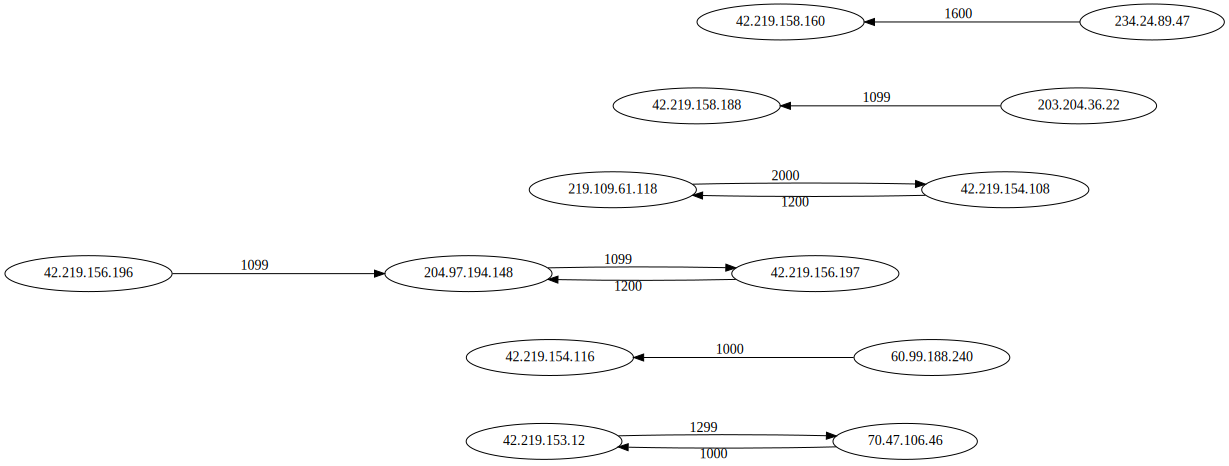

In [245]:
graphvizFromSAM(attack_fim['2016-06-20 14:30:00'], attack_flow['2016-06-20 14:30:00'])

('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.188')
('da:42.219.156.189', 'sa:67.238.185.48', 'sp:25.0')
('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.189')
('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.187')
('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.190')
('da:42.219.156.190', 'sa:67.238.185.48', 'sp:25.0')
('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.185')
('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.195')
('da:42.219.156.184', 'sa:67.238.185.48', 'sp:25.0')
('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.193')
('da:42.219.156.185', 'sa:67.238.185.48', 'sp:25.0')
('da:42.219.156.195', 'sa:67.238.185.48', 'sp:25.0')
('da:42.219.156.193', 'sa:67.238.185.48', 'sp:25.0')
('da:67.238.185.48', 'dp:25.0', 'sa:42.219.156.184')


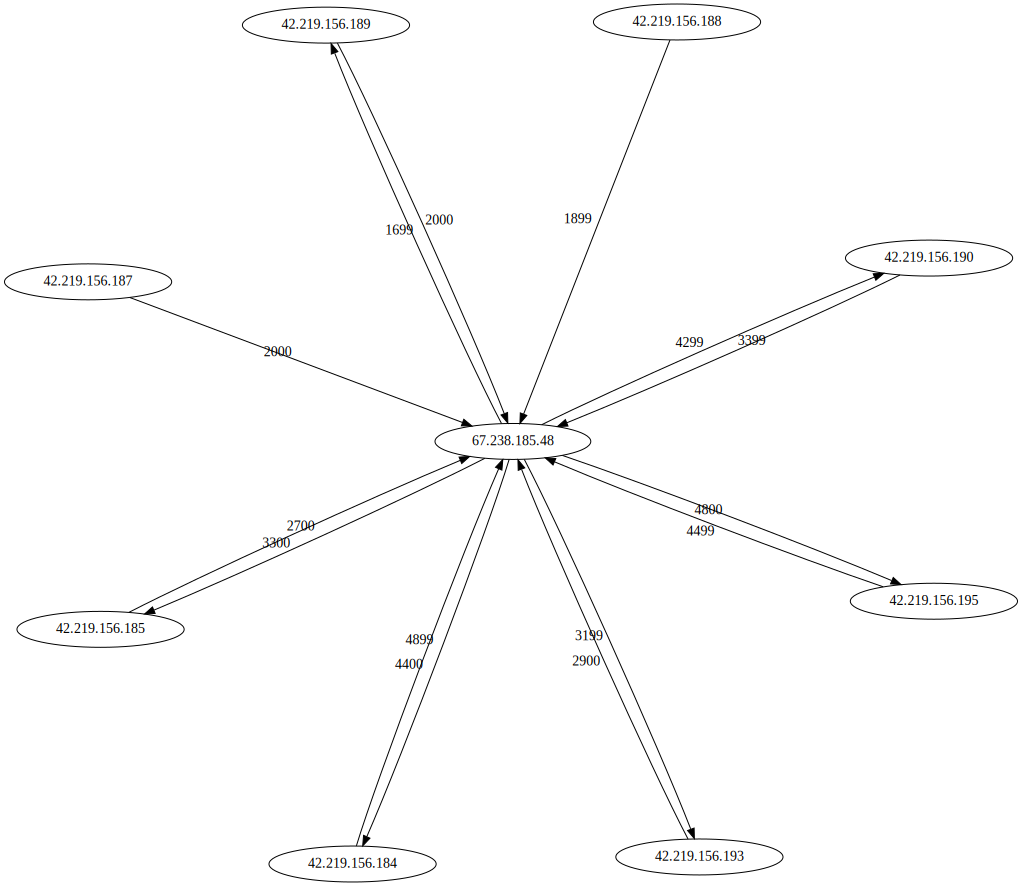

In [246]:
graphvizFromSAM(attack_fim['2016-06-20 15:00:00'], attack_flow['2016-06-20 15:00:00'])

('da:49.125.120.66', 'sa:42.219.158.190', 'sp:25.0')
('da:192.22.24.235', 'dp:25.0', 'sa:42.219.156.223')
('da:42.219.156.212', 'sa:192.22.24.235', 'sp:25.0')
('da:192.22.24.235', 'dp:25.0', 'sa:42.219.156.212')
('da:204.179.54.249', 'sa:42.219.159.196', 'sp:25.0')
('da:192.22.24.235', 'dp:25.0', 'sa:42.219.156.215')
('da:42.219.159.196', 'dp:25.0', 'sa:204.179.54.249')
('da:42.219.156.215', 'sa:192.22.24.235', 'sp:25.0')
('da:42.219.156.214', 'sa:192.22.24.235', 'sp:25.0')
('da:49.125.120.66', 'sa:42.219.154.98', 'sp:25.0')
('da:42.219.154.98', 'dp:25.0', 'sa:49.125.120.66')


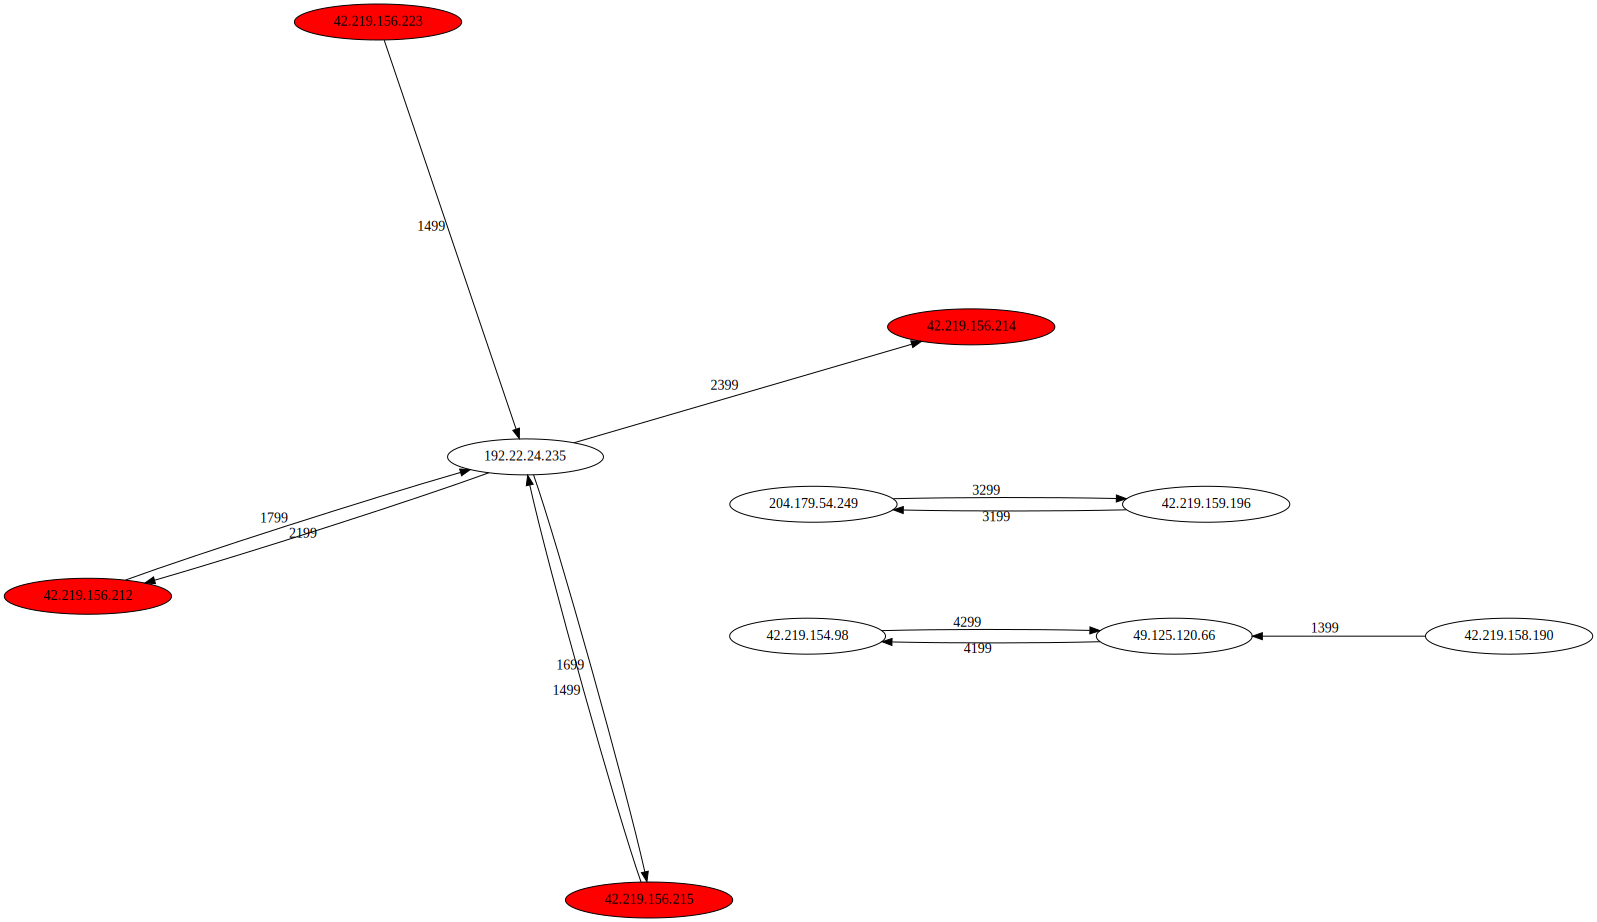

In [247]:
graphvizFromSAM(attack_fim['2016-06-20 16:00:00'], attack_flow['2016-06-20 16:00:00'])

('da:42.219.156.212', 'sa:194.192.119.35', 'sp:25.0')
('da:194.192.119.230', 'dp:25.0', 'sa:42.219.156.223')
('da:194.192.119.35', 'dp:25.0', 'sa:42.219.156.212')
('da:42.219.156.223', 'sa:194.192.119.230', 'sp:25.0')
('da:42.219.156.212', 'sa:177.235.191.18', 'sp:25.0')
('da:253.139.127.226', 'dp:25.0', 'sa:42.219.156.212')
('da:253.139.127.226', 'dp:25.0', 'sa:42.219.156.215')
('da:42.219.156.215', 'sa:253.139.127.224', 'sp:25.0')
('da:42.219.156.223', 'sa:253.139.127.224', 'sp:25.0')
('da:42.219.156.212', 'sa:253.139.127.226', 'sp:25.0')
('da:42.219.156.215', 'sa:253.139.127.226', 'sp:25.0')
('da:253.139.127.227', 'dp:25.0', 'sa:42.219.156.215')
('da:253.139.127.227', 'dp:25.0', 'sa:42.219.156.223')
('da:253.139.127.224', 'dp:25.0', 'sa:42.219.156.215')
('da:253.139.127.224', 'dp:25.0', 'sa:42.219.156.223')
('da:42.219.156.215', 'sa:253.139.127.227', 'sp:25.0')
('da:42.219.156.223', 'sa:253.139.127.227', 'sp:25.0')


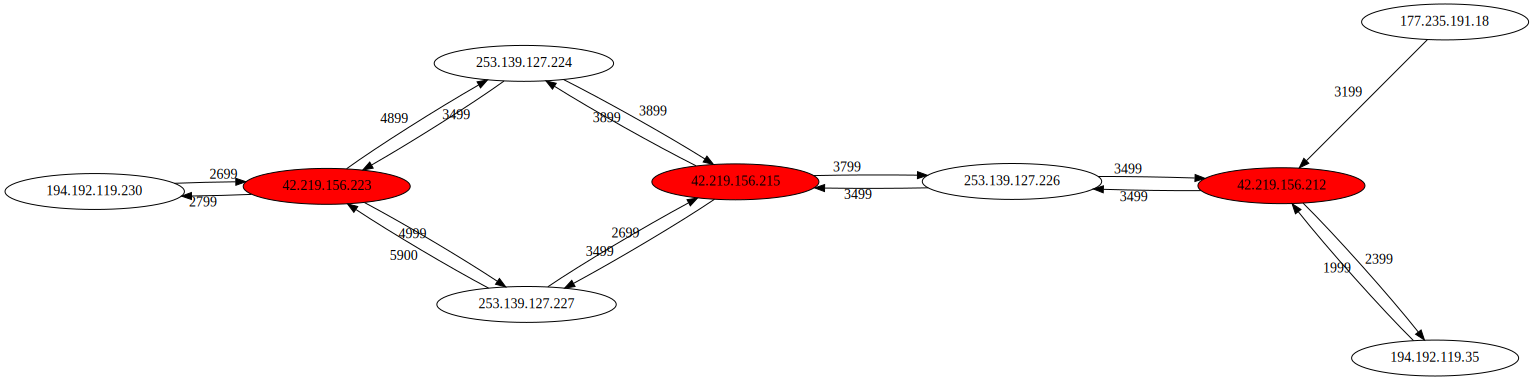

In [248]:
graphvizFromSAM(attack_fim['2016-06-20 16:30:00'], attack_flow['2016-06-20 16:30:00'])

('da:42.219.156.223', 'sa:253.139.127.225', 'sp:25.0')
('da:253.139.127.225', 'dp:25.0', 'sa:42.219.156.223')
('da:42.219.156.223', 'sa:253.136.160.168', 'sp:25.0')
('da:253.136.160.168', 'dp:25.0', 'sa:42.219.156.223')
('da:42.219.156.223', 'sa:253.139.127.227', 'sp:25.0')
('da:253.139.127.224', 'dp:25.0', 'sa:42.219.156.215')
('da:42.219.156.215', 'sa:253.139.127.224', 'sp:25.0')
('da:42.219.156.223', 'sa:253.139.127.224', 'sp:25.0')
('da:253.139.127.227', 'dp:25.0', 'sa:42.219.156.223')
('da:177.235.191.18', 'dp:25.0', 'sa:42.219.156.212')
('da:42.219.156.212', 'sa:177.235.191.18', 'sp:25.0')
('da:42.219.156.212', 'sa:253.139.127.226', 'sp:25.0')
('da:253.139.127.226', 'dp:25.0', 'sa:42.219.156.215')
('da:253.139.127.226', 'dp:25.0', 'sa:42.219.156.212')
('da:42.219.156.223', 'sa:194.192.119.35', 'sp:25.0')
('da:42.219.156.212', 'sa:194.192.119.35', 'sp:25.0')
('da:194.192.119.35', 'dp:25.0', 'sa:42.219.156.212')
('da:194.192.119.35', 'dp:25.0', 'sa:42.219.156.223')
('da:194.192.119

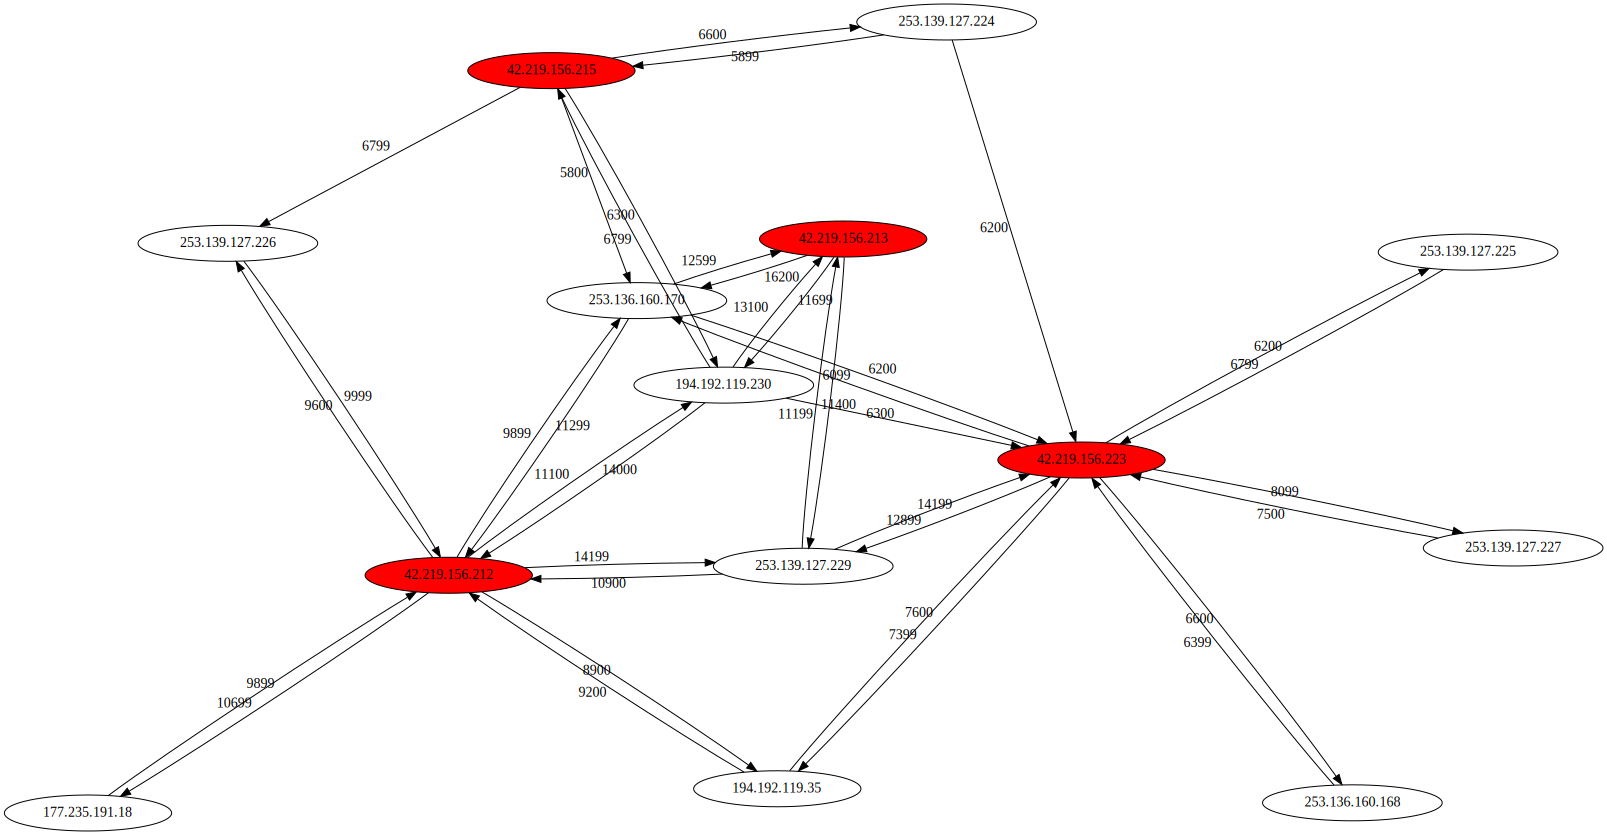

In [249]:
graphvizFromSAM(attack_fim['2016-06-20 17:00:00'], attack_flow['2016-06-20 17:00:00'])

('da:42.219.156.223', 'sa:194.192.119.38', 'sp:25.0')
('da:42.219.156.223', 'sa:253.139.127.227', 'sp:25.0')
('da:42.219.156.223', 'sa:253.139.127.225', 'sp:25.0')
('da:42.219.156.215', 'sa:253.136.161.201', 'sp:25.0')
('da:42.219.156.215', 'sa:177.235.191.17', 'sp:25.0')
('da:42.219.156.213', 'sa:194.192.119.230', 'sp:25.0')
('da:42.219.156.212', 'sa:194.192.119.230', 'sp:25.0')
('da:42.219.156.213', 'sa:253.136.160.170', 'sp:25.0')
('da:42.219.156.223', 'sa:253.136.160.170', 'sp:25.0')
('da:42.219.156.212', 'sa:253.136.160.170', 'sp:25.0')
('da:42.219.156.213', 'sa:253.139.127.229', 'sp:25.0')
('da:42.219.156.223', 'sa:253.139.127.229', 'sp:25.0')
('da:42.219.156.215', 'sa:253.139.127.229', 'sp:25.0')
('da:42.219.156.212', 'sa:253.139.127.229', 'sp:25.0')


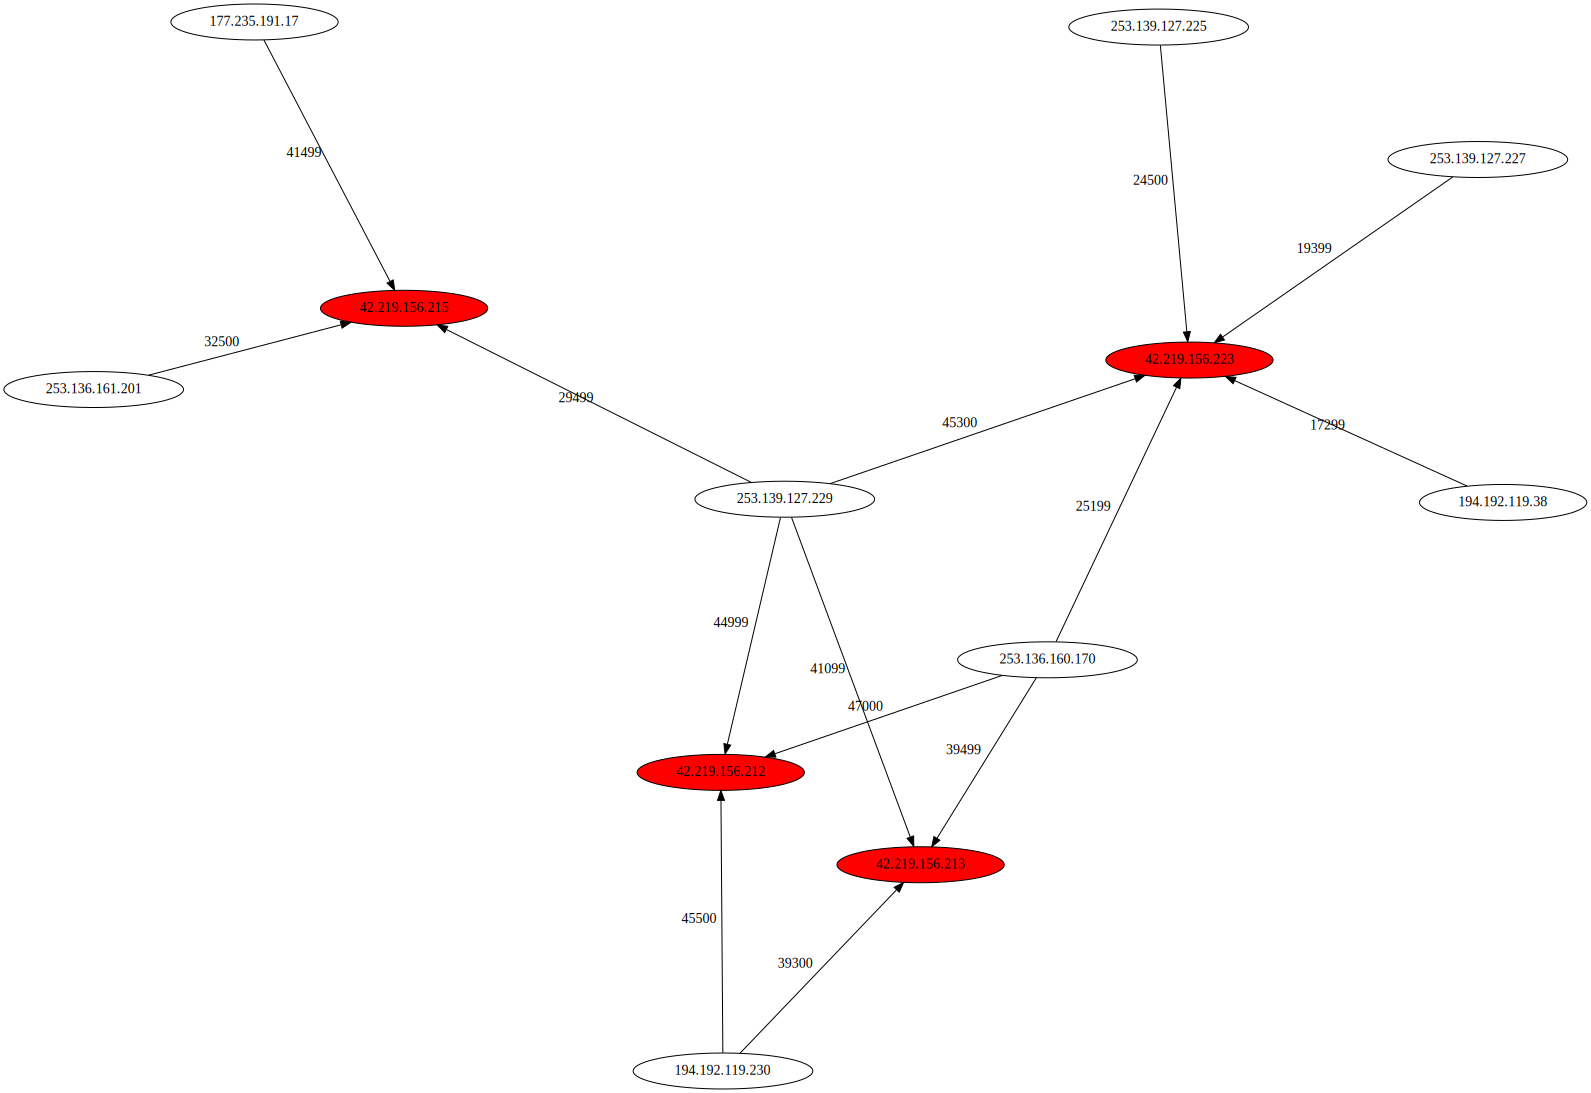

In [238]:
graphvizFromSAM(attack_fim['2016-06-20 17:30:00'], attack_flow['2016-06-20 17:30:00'])

In [6]:
anom_df = pd.read_csv("Netflow Data/attack_ts_june_week4.csv")

In [7]:
anom_groups = ugr.readAndGroupByTimebin("Netflow Data/attack_ts_june_week4.csv", 30 * 60).agg(max)

In [8]:
def roundDownTime(row, timeWidth, col='te'):
    d = parse(row[col])
    epoch_seconds = int(d.timestamp() // timeWidth)
    return datetime.datetime.fromtimestamp(epoch_seconds * timeWidth)
anom_df['time'] = anom_df.apply(lambda row:roundDownTime(row, width), axis=1) 
def timeBin(df, width, col = 'te'):
    """
    returns new df with new column timebin
    """
    # col = 'te'
    df['timebin'] = df.apply (lambda row: createTimebin(row, width, col),axis=1)
    return df

In [78]:
anom_df = anom_df.groupby('time').agg(max)[['anomaly-spam']]
anom_df = anom_df[anom_df['anomaly-spam'] > 0]
anom_df = anom_df[anom_df.index < pd.to_datetime("2016-06-21 00:00:00")]
anom_df.index = pd.to_datetime(anom_df.index)
anom_df

,anomaly-spam
time,
2016-06-20 12:00:00,1
2016-06-20 12:30:00,1
2016-06-20 13:00:00,1
2016-06-20 14:00:00,1
2016-06-20 14:30:00,1
2016-06-20 15:00:00,1
2016-06-20 15:30:00,1
2016-06-20 16:00:00,1
2016-06-20 16:30:00,1


In [79]:
allSpamWindows = set()
for row in anom_df.iterrows():
    allSpamWindows.add(row[0])

In [80]:
fim_20 = pickle.load(open('Processed Data/2016-06-20_100.pb', 'rb'))
agg_20_df = pd.read_csv("Processed Data/2016-06-20_100.csv")
agg_20_df['datetime'] = pd.to_datetime(agg_20_df['datetime'])
agg_20_df['label'] = agg_20_df.apply(lambda r: 'spam' if r['datetime'] in allSpamWindows else 'normal', axis=1)

In [83]:
agg_20_df.head()

,datetime,flows,H(sa),H(da),H(sp),H(dp),label
0,2016-06-20 00:00:00,457,4.334708,4.361788,3.531699,3.481884,normal
1,2016-06-20 00:30:00,1243,3.668767,3.653977,4.032222,3.912921,normal
2,2016-06-20 01:00:00,572,4.458458,4.383100,3.587056,3.589359,normal
3,2016-06-20 01:30:00,2225,2.896686,2.885060,4.165139,4.283128,normal
4,2016-06-20 02:00:00,510,4.198217,4.197532,3.864280,3.171567,normal


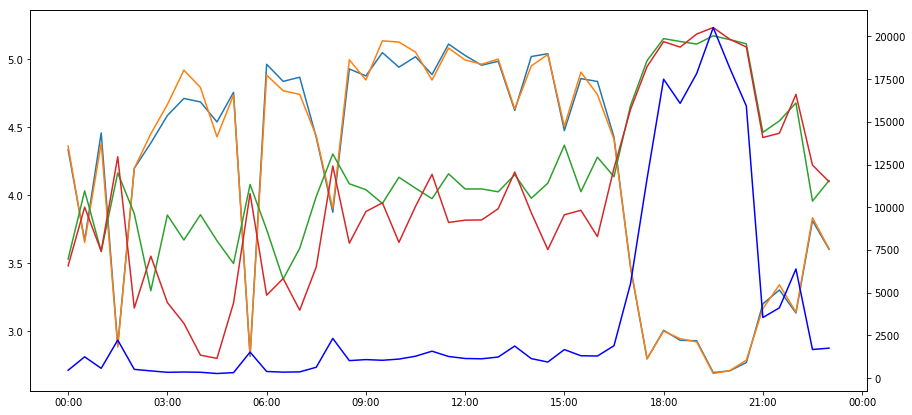

In [60]:
fig, ax1 = plt.subplots(figsize = (15,7))
# fig.autofmt_xdate()
ax1.plot(agg_20_df['datetime'], agg_20_df['H(sa)'])
ax1.plot(agg_20_df['datetime'], agg_20_df['H(da)'])
ax1.plot(agg_20_df['datetime'], agg_20_df['H(sp)'])
ax1.plot(agg_20_df['datetime'], agg_20_df['H(dp)'])

ax2 = ax1.twinx()
ax2.plot(agg_20_df['datetime'], agg_20_df['flows'], color='b')

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09f6390048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f09f5d21a58>]], dtype=object)

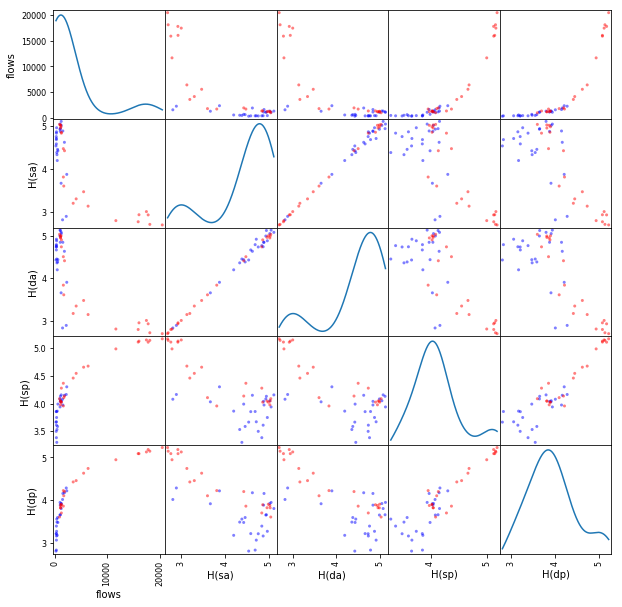

In [104]:
from pandas.plotting import scatter_matrix
colors = np.where(agg_20_df['label']=='normal','b','r')
scatter_matrix(agg_20_df[['flows','H(sa)','H(da)','H(sp)','H(dp)']],c=colors,figsize=(10,10),diagonal='kde')

## SVM on entropy

In [93]:
X = [[r["flows"], r["H(sa)"], r["H(da)"], r["H(sp)"], r["H(dp)"]] 
     for r in [x[1] for x in agg_20_df.iterrows()]]
Y_truth = [r['label'] 
           for r in [x[1] for x in agg_20_df.iterrows()]]

In [95]:
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn import svm

In [100]:
clf = svm.SVC()
clf.fit(X, Y_truth)

y_pred = [clf.predict([pt]) for pt in X]
accuracy_score(Y_truth, y_pred, normalize=True)

1.0

## Plot graphs

In [105]:
flows = list(agg_20_df['flows'])

In [107]:
fim_20.keys()

dict_keys(['2016-06-20 00:00:00', '2016-06-20 00:30:00', '2016-06-20 01:00:00', '2016-06-20 01:30:00', '2016-06-20 02:00:00', '2016-06-20 02:30:00', '2016-06-20 03:00:00', '2016-06-20 03:30:00', '2016-06-20 04:00:00', '2016-06-20 04:30:00', '2016-06-20 05:00:00', '2016-06-20 05:30:00', '2016-06-20 06:00:00', '2016-06-20 06:30:00', '2016-06-20 07:00:00', '2016-06-20 07:30:00', '2016-06-20 08:00:00', '2016-06-20 08:30:00', '2016-06-20 09:00:00', '2016-06-20 09:30:00', '2016-06-20 10:00:00', '2016-06-20 10:30:00', '2016-06-20 11:00:00', '2016-06-20 11:30:00', '2016-06-20 12:00:00', '2016-06-20 12:30:00', '2016-06-20 13:00:00', '2016-06-20 13:30:00', '2016-06-20 14:00:00', '2016-06-20 14:30:00', '2016-06-20 15:00:00', '2016-06-20 15:30:00', '2016-06-20 16:00:00', '2016-06-20 16:30:00', '2016-06-20 17:00:00', '2016-06-20 17:30:00', '2016-06-20 18:00:00', '2016-06-20 18:30:00', '2016-06-20 19:00:00', '2016-06-20 19:30:00', '2016-06-20 20:00:00', '2016-06-20 20:30:00', '2016-06-20 21:00:00', 

In [116]:
for idx, dt in enumerate(fim_20.keys()):
    fim = fim_20[dt]
    f = flows[idx]
    g = graphvizFromSAM(fim, f)
    g.render('images/UGDS/2016-06-20_SMTP/'+str(dt))